In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'darkgrid')


# EDA

### 1. Data info and the first 5 rows of the data

In [2]:
df_hotel_booking = pd.read_csv('hotel_bookings.csv')
df_hotel_booking = df_hotel_booking.sample(n=50000, random_state=42)
df_hotel_booking.reset_index(inplace=True)
df_hotel_booking.drop(['index'],axis=1, inplace=True)
df_hotel_booking.info()
df_hotel_booking.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           50000 non-null  object 
 1   is_canceled                     50000 non-null  int64  
 2   lead_time                       50000 non-null  int64  
 3   arrival_date_year               50000 non-null  int64  
 4   arrival_date_month              50000 non-null  object 
 5   arrival_date_week_number        50000 non-null  int64  
 6   arrival_date_day_of_month       50000 non-null  int64  
 7   stays_in_weekend_nights         50000 non-null  int64  
 8   stays_in_week_nights            50000 non-null  int64  
 9   adults                          50000 non-null  int64  
 10  children                        50000 non-null  float64
 11  babies                          50000 non-null  int64  
 12  meal                            

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,203,2016,December,49,2,2,5,2,...,No Deposit,250.0,NaN,0,Transient,66.8,0,0,Check-Out,2016-12-09
1,City Hotel,1,82,2015,July,29,16,0,3,2,...,No Deposit,9.0,NaN,0,Transient,76.5,0,0,Canceled,2015-07-16
2,City Hotel,0,25,2016,December,53,27,0,3,3,...,No Deposit,220.0,NaN,0,Transient-Party,60.0,0,1,Check-Out,2016-12-30
3,City Hotel,0,1,2016,March,11,9,0,1,1,...,No Deposit,9.0,NaN,0,Transient-Party,95.0,0,0,Check-Out,2016-03-10
4,City Hotel,0,70,2017,April,16,16,2,2,2,...,No Deposit,9.0,NaN,0,Transient,108.0,0,0,Check-Out,2017-04-20


### 2. Getting Information from the data

In [3]:
df_hotel_booking.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,43158.000000,2845.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,0.371600,104.030080,2016.157220,27.156940,15.802880,0.923300,2.491960,1.857600,0.102120,0.007960,0.031660,0.085060,0.137620,0.221220,86.665091,188.391564,2.26486,101.955308,0.061460,0.573240
std,0.483237,106.953591,0.708288,13.592113,8.754873,0.992168,1.896082,0.550898,0.396856,0.098065,0.175095,0.805951,1.494191,0.645205,110.807878,131.573433,17.43284,48.091588,0.241669,0.794083
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,0.00000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.00000,69.182500,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,174.000000,0.00000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.00000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,9.000000,1.000000,26.000000,72.000000,18.000000,531.000000,541.000000,391.00000,508.000000,3.000000,5.000000


In [4]:
df_hotel_booking.reservation_status.value_counts()

Check-Out    31420
Canceled     18085
No-Show        495
Name: reservation_status, dtype: int64

In [5]:
pd.pivot_table(data = df_hotel_booking, values = ['is_canceled'], index = ['country','hotel'], aggfunc = 'count').sort_values('is_canceled', ascending=False)

is_canceled
country hotel                    
PRT     City Hotel          13050
        Resort Hotel         7298
FRA     City Hotel           3650
GBR     Resort Hotel         2844
DEU     City Hotel           2576
...                           ...
SUR     Resort Hotel            1
EGY     Resort Hotel            1
DJI     Resort Hotel            1
SYR     City Hotel              1
ZWE     Resort Hotel            1

[245 rows x 1 columns]

In [6]:
pd.pivot_table(data = df_hotel_booking, values = 'adr', index = ['hotel'], aggfunc = 'mean')

,adr
hotel,
City Hotel,105.232684
Resort Hotel,95.451225


In [7]:
pd.pivot_table(data = df_hotel_booking, values = 'is_canceled', index = ['hotel','market_segment'], aggfunc = 'count')

is_canceled
hotel        market_segment             
City Hotel   Aviation                 98
             Complementary           216
             Corporate              1262
             Direct                 2570
             Groups                 5952
             Offline TA/TO          7017
             Online TA             16132
Resort Hotel Complementary            76
             Corporate               962
             Direct                 2781
             Groups                 2456
             Offline TA/TO          3124
             Online TA              7354

In [8]:
pd.pivot_table(data = df_hotel_booking, values = 'is_canceled', index = ['hotel'], aggfunc = 'count')

,is_canceled
hotel,
City Hotel,33247
Resort Hotel,16753


### 3. Show the data distributions

array([[<AxesSubplot:title={'center':'is_canceled'}>,
        <AxesSubplot:title={'center':'lead_time'}>,
        <AxesSubplot:title={'center':'arrival_date_year'}>,
        <AxesSubplot:title={'center':'arrival_date_week_number'}>],
       [<AxesSubplot:title={'center':'arrival_date_day_of_month'}>,
        <AxesSubplot:title={'center':'stays_in_weekend_nights'}>,
        <AxesSubplot:title={'center':'stays_in_week_nights'}>,
        <AxesSubplot:title={'center':'adults'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'babies'}>,
        <AxesSubplot:title={'center':'is_repeated_guest'}>,
        <AxesSubplot:title={'center':'previous_cancellations'}>],
       [<AxesSubplot:title={'center':'previous_bookings_not_canceled'}>,
        <AxesSubplot:title={'center':'booking_changes'}>,
        <AxesSubplot:title={'center':'agent'}>,
        <AxesSubplot:title={'center':'company'}>],
       [<AxesSubplot:title={'center':'days_in_waiting_list'}>,


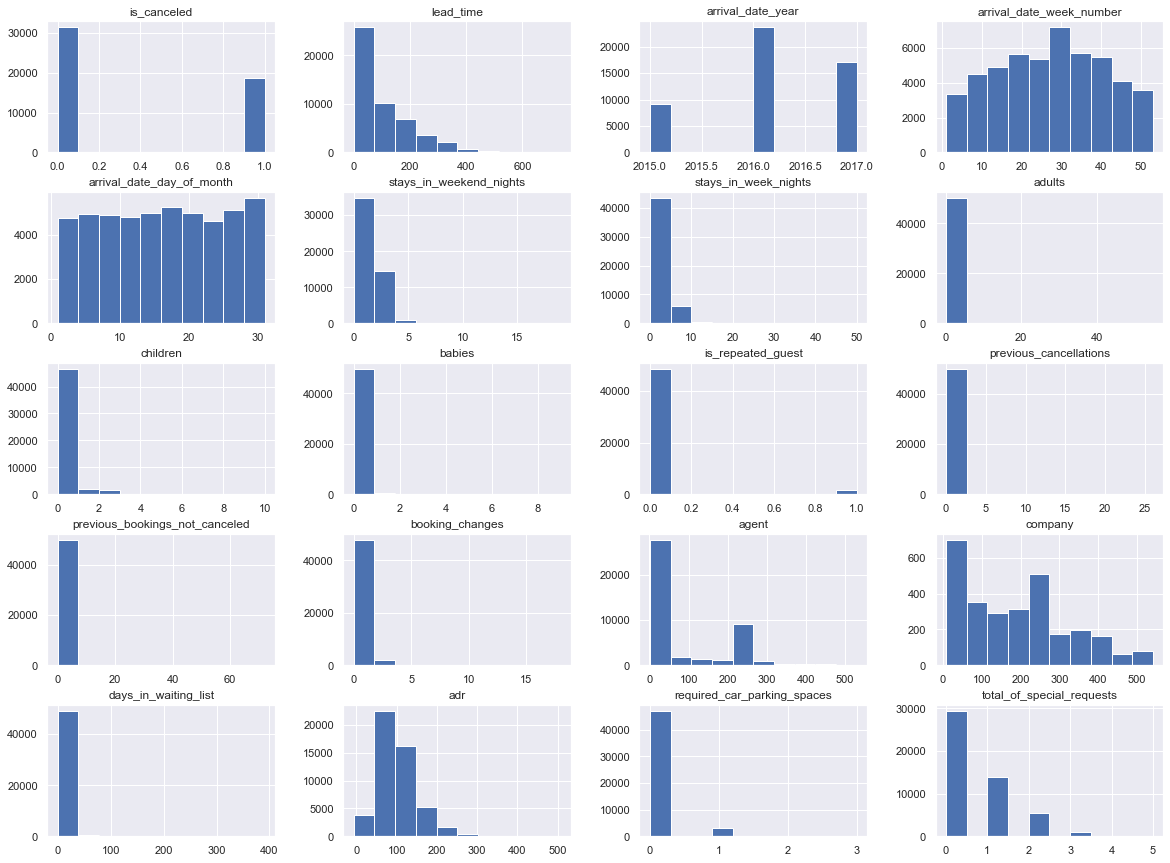

In [9]:
df_hotel_booking.hist(figsize=(20,15))

# Data Cleaning

### 1. Finding Duplicated Data

In [10]:
df_hotel_booking.duplicated().any()

True

### 2. Finding Outliers

<AxesSubplot:>

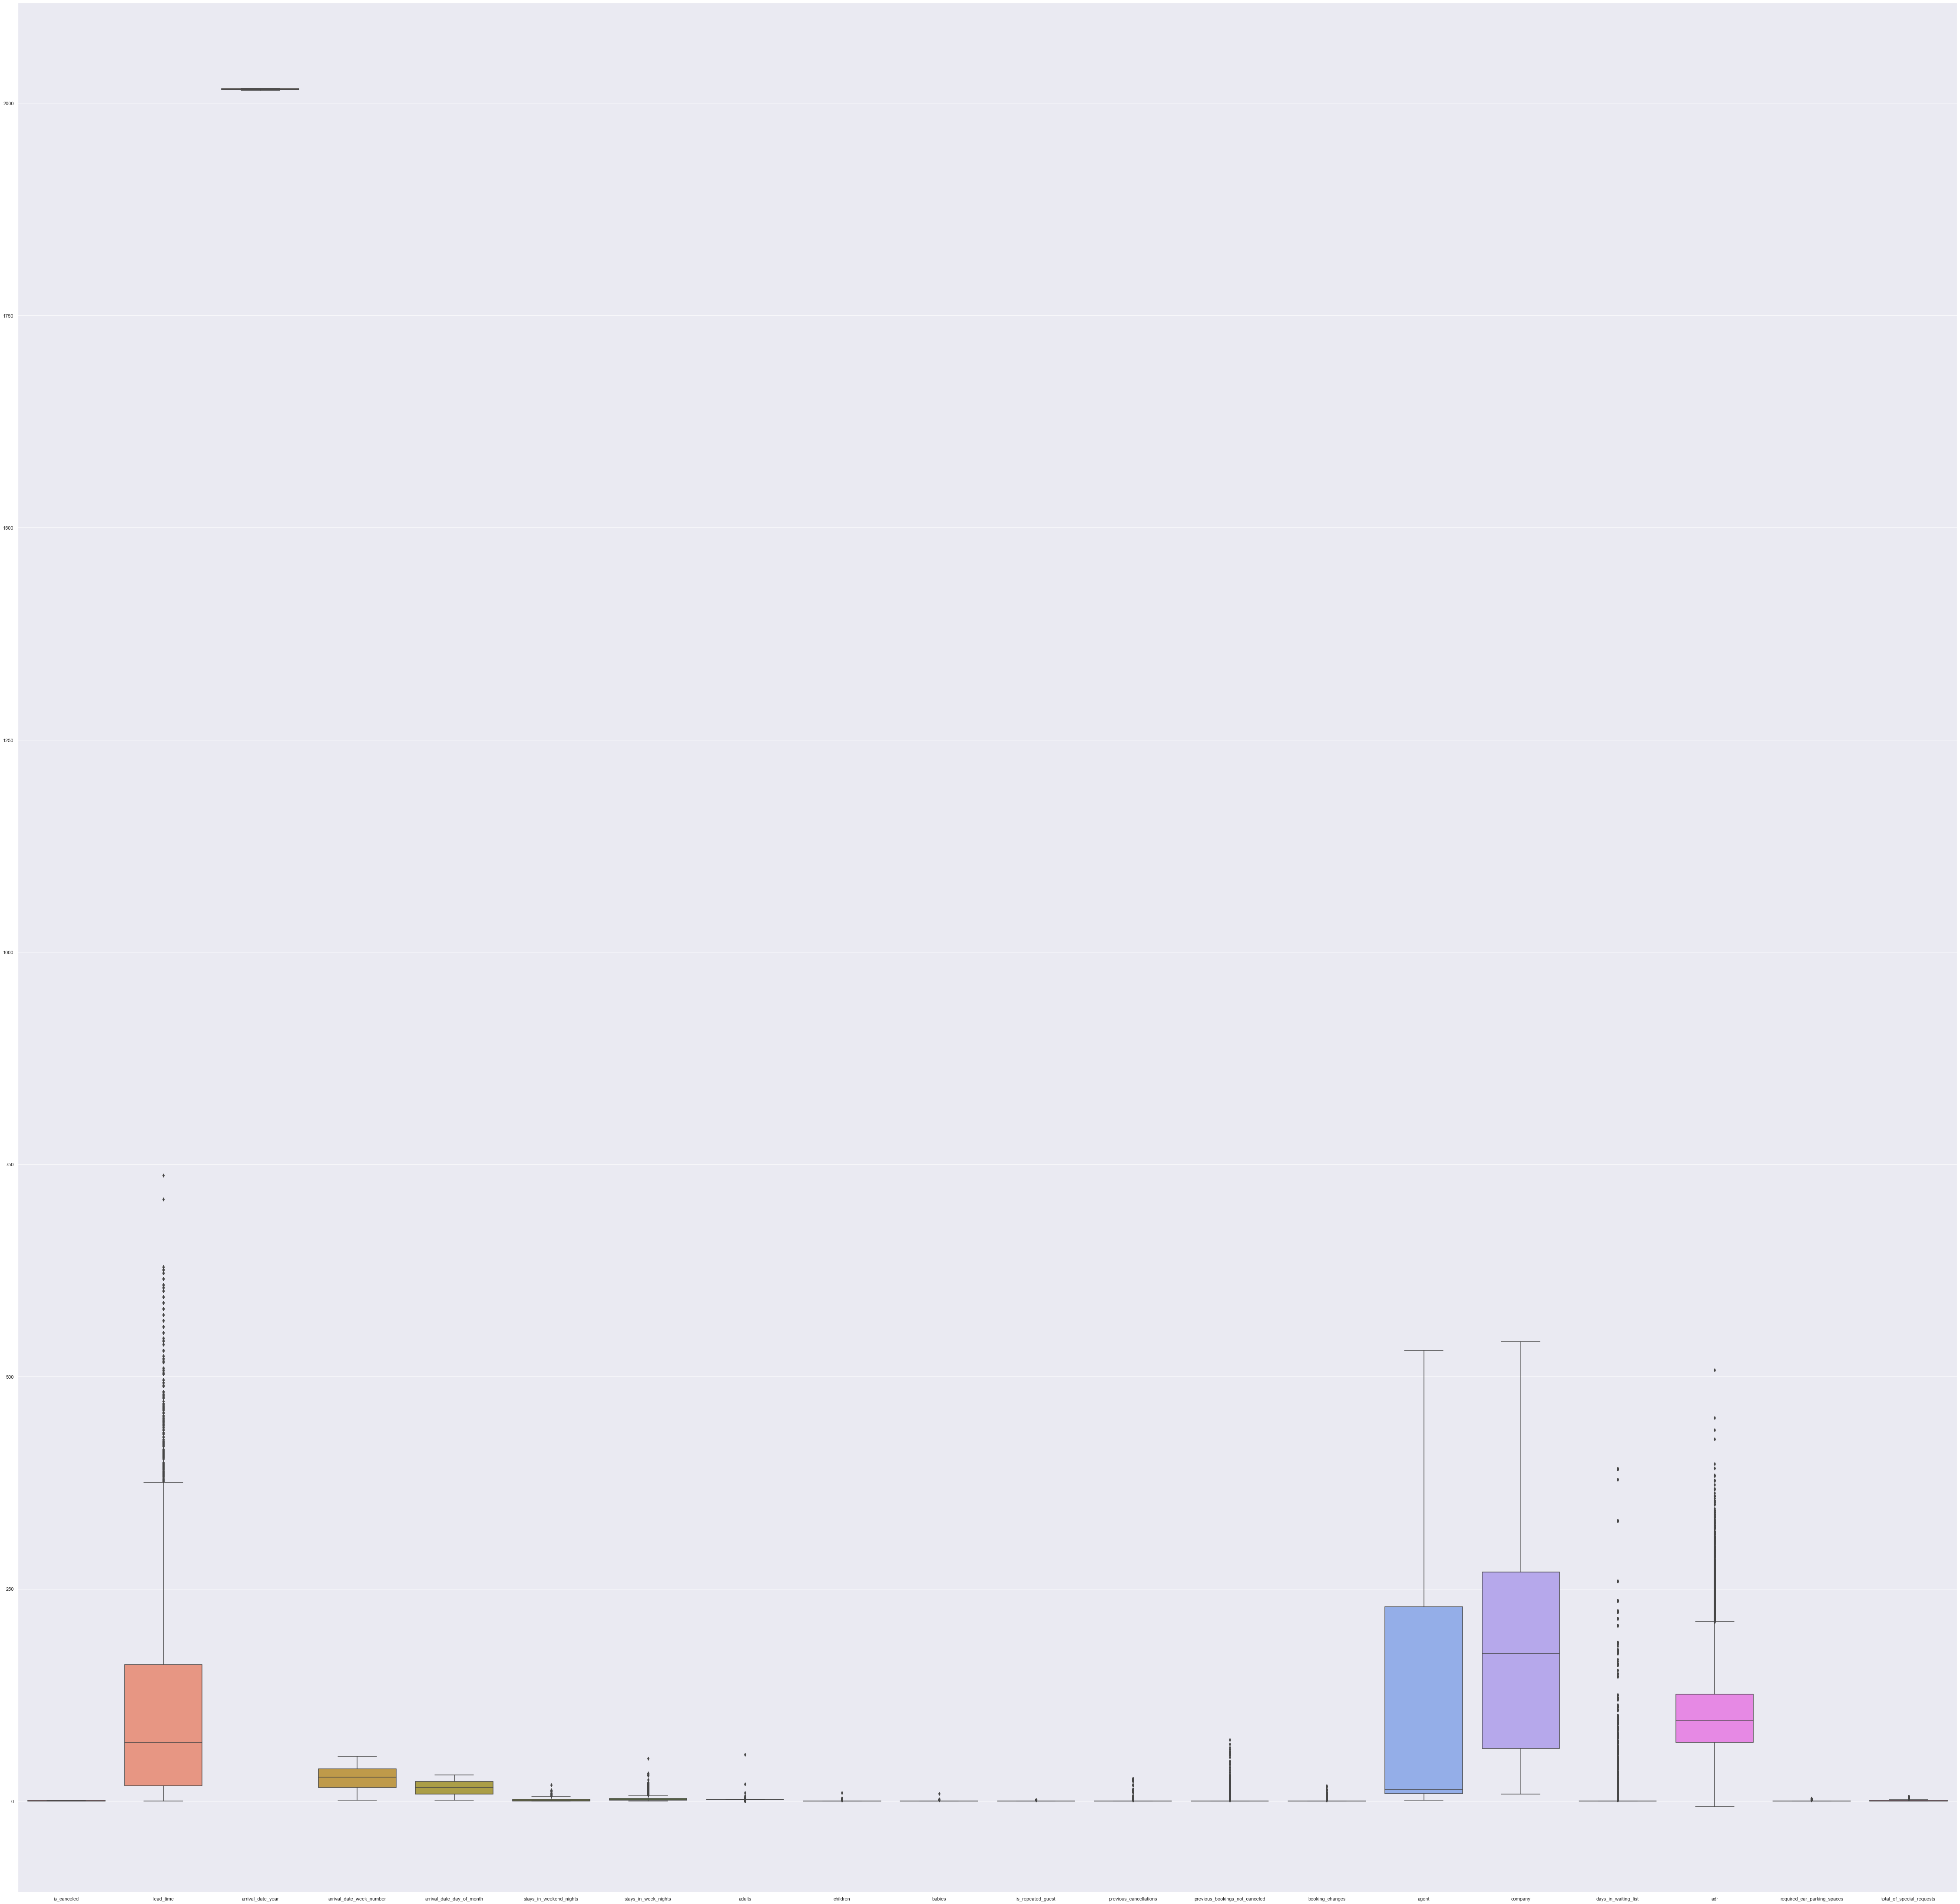

In [11]:
plt.figure(figsize=(80,80))
sns.boxplot(data = df_hotel_booking, orient = 'vertical')

### 3. Finding Missing Values

In [12]:
df_hotel_booking.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             209
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              6842
company                           47155


In [13]:
def missing_data(df):
    miss1 = pd.DataFrame(df.isna().sum()).reset_index()
    miss1.columns = ['columns', 'Total']
    miss2 = pd.DataFrame(df.isna().sum()/df.shape[0]*100).reset_index()
    miss2.columns = ['columns', '%']
    miss = miss1.merge(miss2, how='inner', on='columns')
    return miss[miss['Total']!=0]

In [14]:
missing_data(df_hotel_booking)

,columns,Total,%
13,country,209,0.418
23,agent,6842,13.684
24,company,47155,94.310


### 4.Cleaning Missing Values

In [15]:
df_hotel_booking['children'].describe()

count    50000.000000
mean         0.102120
std          0.396856
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: children, dtype: float64

C:\Users\davin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children', ylabel='count'>

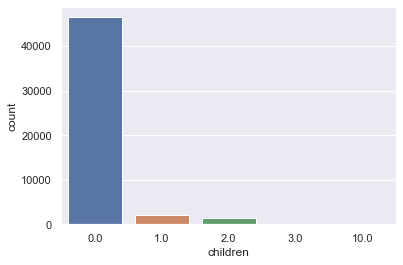

In [16]:
sns.countplot(df_hotel_booking['children'])

In [17]:
mode_children = df_hotel_booking['children'].mode()[0]
df_hotel_booking['children'] = df_hotel_booking['children'].fillna(mode_children)

In [18]:
df_hotel_booking['country'].describe()

count     49791
unique      150
top         PRT
freq      20348
Name: country, dtype: object

C:\Users\davin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='country', ylabel='count'>

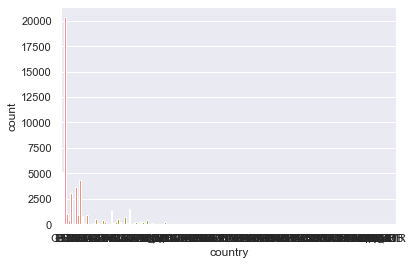

In [19]:
sns.countplot(df_hotel_booking['country'])

In [20]:
mode_country = df_hotel_booking['country'].mode()[0]
df_hotel_booking['country'] = df_hotel_booking['country'].fillna(mode_country)

In [21]:
df_hotel_booking['agent'].describe()

count    43158.000000
mean        86.665091
std        110.807878
min          1.000000
25%          9.000000
50%         14.000000
75%        229.000000
max        531.000000
Name: agent, dtype: float64

In [22]:
mean_agent = df_hotel_booking['agent'].mean()
df_hotel_booking['agent'] = df_hotel_booking['agent'].fillna(mean_agent)

In [23]:
df_hotel_booking.drop('company', axis = 1, inplace = True)

In [24]:
df_hotel_booking.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [25]:
df_hotel_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           50000 non-null  object 
 1   is_canceled                     50000 non-null  int64  
 2   lead_time                       50000 non-null  int64  
 3   arrival_date_year               50000 non-null  int64  
 4   arrival_date_month              50000 non-null  object 
 5   arrival_date_week_number        50000 non-null  int64  
 6   arrival_date_day_of_month       50000 non-null  int64  
 7   stays_in_weekend_nights         50000 non-null  int64  
 8   stays_in_week_nights            50000 non-null  int64  
 9   adults                          50000 non-null  int64  
 10  children                        50000 non-null  float64
 11  babies                          50000 non-null  int64  
 12  meal                            

### 5. Cleaning Duplicates

In [26]:
df_hotel_booking.drop_duplicates(inplace=True, ignore_index = True)

In [27]:
df_hotel_booking.duplicated().any()

False

In [28]:
df_hotel_booking.info()
df_hotel_booking.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39258 entries, 0 to 39257
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           39258 non-null  object 
 1   is_canceled                     39258 non-null  int64  
 2   lead_time                       39258 non-null  int64  
 3   arrival_date_year               39258 non-null  int64  
 4   arrival_date_month              39258 non-null  object 
 5   arrival_date_week_number        39258 non-null  int64  
 6   arrival_date_day_of_month       39258 non-null  int64  
 7   stays_in_weekend_nights         39258 non-null  int64  
 8   stays_in_week_nights            39258 non-null  int64  
 9   adults                          39258 non-null  int64  
 10  children                        39258 non-null  float64
 11  babies                          39258 non-null  int64  
 12  meal                            

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,203,2016,December,49,2,2,5,2,...,4,No Deposit,250.0,0,Transient,66.8,0,0,Check-Out,2016-12-09
1,City Hotel,1,82,2015,July,29,16,0,3,2,...,0,No Deposit,9.0,0,Transient,76.5,0,0,Canceled,2015-07-16
2,City Hotel,0,25,2016,December,53,27,0,3,3,...,2,No Deposit,220.0,0,Transient-Party,60.0,0,1,Check-Out,2016-12-30
3,City Hotel,0,1,2016,March,11,9,0,1,1,...,0,No Deposit,9.0,0,Transient-Party,95.0,0,0,Check-Out,2016-03-10
4,City Hotel,0,70,2017,April,16,16,2,2,2,...,0,No Deposit,9.0,0,Transient,108.0,0,0,Check-Out,2017-04-20


### 6. Cleaning Outliers

In [29]:
def outlier(datacolumn):
    sorted(datacolumn)
    q1,q3 = np.percentile(datacolumn,[25,75])
    IQR= q3 - q1
    lower = q1 - (1.5*IQR)
    upper = q3 + (1.5*IQR)
    return lower,upper

#### Removing Lead Time Outliers

In [30]:
lower,upper=outlier(df_hotel_booking['lead_time'])
print(lower,upper)

-166.5 309.5


In [31]:
df_hotel_booking[(df_hotel_booking['lead_time'] < lower) | (df_hotel_booking['lead_time']>upper)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
26,City Hotel,1,360,2015,October,42,12,1,1,2,...,0,Non Refund,1.000000,0,Contract,62.00,0,0,Canceled,2015-01-01
27,Resort Hotel,1,378,2016,November,45,1,0,2,2,...,0,Non Refund,248.000000,0,Transient,46.00,0,0,Canceled,2016-10-18
32,City Hotel,0,349,2016,October,41,4,1,5,2,...,0,No Deposit,58.000000,162,Transient-Party,123.33,0,0,Check-Out,2016-10-10
38,City Hotel,0,386,2016,October,44,23,2,0,2,...,0,No Deposit,6.000000,0,Transient-Party,115.00,0,1,Check-Out,2016-10-25
55,City Hotel,1,364,2015,October,42,16,0,2,2,...,0,Non Refund,6.000000,0,Transient-Party,101.50,0,0,Canceled,2015-07-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38748,City Hotel,1,334,2015,September,38,16,0,2,1,...,0,Non Refund,1.000000,0,Transient-Party,60.00,0,0,Canceled,2015-07-02
38795,Resort Hotel,0,365,2016,October,42,13,1,3,2,...,1,No Deposit,86.665091,0,Transient-Party,66.00,0,1,Check-Out,2016-10-17
38838,Resort Hotel,1,312,2017,August,31,4,2,2,2,...,2,No Deposit,240.000000,0,Transient,244.00,0,2,Canceled,2017-04-24
38990,Resort Hotel,1,364,2017,April,14,3,1,3,2,...,0,No Deposit,147.000000,0,Transient,195.98,0,0,Canceled,2016-07-04


In [32]:
df_hotel_booking.drop(df_hotel_booking[(df_hotel_booking['lead_time'] < lower) | (df_hotel_booking['lead_time']>upper)].index, inplace = True)

C:\Users\davin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lead_time'>

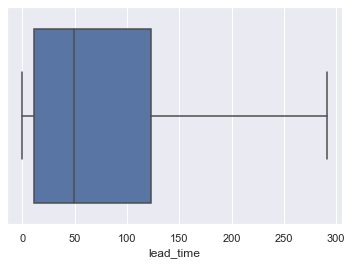

In [33]:
sns.boxplot(df_hotel_booking['lead_time'], showfliers=False)

#### Remove adr Outliers

In [34]:
outlier(df_hotel_booking['adr'])

(-19.799999999999983, 224.99999999999997)

In [35]:
df_hotel_booking[(df_hotel_booking['adr'] < lower) | (df_hotel_booking['adr']>upper)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
426,Resort Hotel,0,22,2017,August,34,25,1,2,2,...,1,No Deposit,240.000000,0,Transient-Party,314.67,0,2,Check-Out,2017-08-28
1170,Resort Hotel,0,22,2017,August,33,19,2,2,3,...,0,No Deposit,240.000000,0,Transient,340.00,0,1,Check-Out,2017-08-23
1184,Resort Hotel,1,59,2017,August,33,13,2,4,2,...,1,No Deposit,250.000000,0,Transient,437.00,0,0,Canceled,2017-08-03
1497,Resort Hotel,0,129,2016,August,32,6,2,5,2,...,0,No Deposit,242.000000,0,Transient,327.40,0,2,Check-Out,2016-08-13
1565,Resort Hotel,0,3,2017,July,27,8,0,1,3,...,2,No Deposit,240.000000,0,Transient,322.00,1,0,Check-Out,2017-07-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37246,City Hotel,1,0,2017,August,33,19,0,1,2,...,0,No Deposit,86.665091,0,Group,318.00,0,0,Canceled,2017-08-19
37628,Resort Hotel,0,24,2017,August,33,17,0,3,2,...,1,No Deposit,240.000000,0,Transient,392.00,1,1,Check-Out,2017-08-20
38082,City Hotel,0,14,2017,April,17,25,0,4,2,...,0,No Deposit,14.000000,0,Transient,324.50,1,2,Check-Out,2017-04-29
38960,Resort Hotel,1,75,2016,August,34,16,0,4,3,...,0,No Deposit,240.000000,0,Transient,314.50,0,0,Canceled,2016-06-02


In [36]:
df_hotel_booking.drop(df_hotel_booking[(df_hotel_booking['adr'] <= lower) | (df_hotel_booking['adr']>=upper)].index, inplace = True)

C:\Users\davin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='adr'>

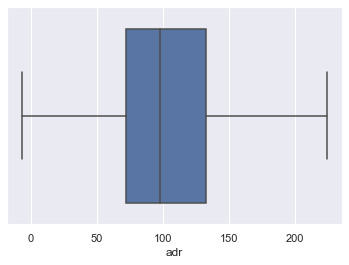

In [37]:
sns.boxplot(df_hotel_booking['adr'], showfliers=False)

# Data Visualization

### 1. Bar graph showing the occurance of customers canceling their bookings

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

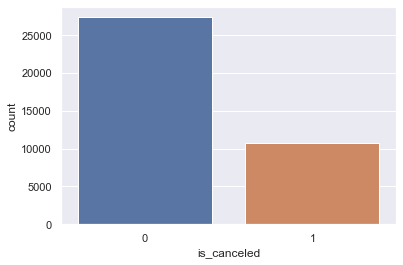

In [38]:
sns.countplot(data = df_hotel_booking, x = 'is_canceled')

### 2. Bar graph showing the most booked room type

<AxesSubplot:xlabel='reserved_room_type', ylabel='count'>

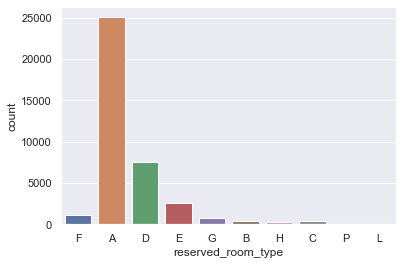

In [39]:
sns.countplot(data = df_hotel_booking, x = 'reserved_room_type')

### 3. Showing the time customers book rooms

<AxesSubplot:>

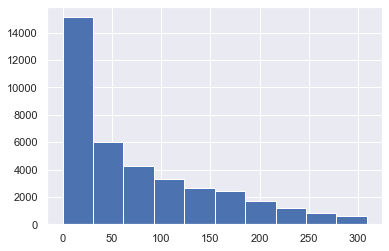

In [40]:
df_hotel_booking['lead_time'].hist()

### 4. Showing which hotel has the most bookings canceled

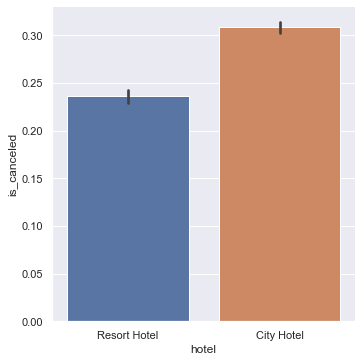

In [41]:
sns.catplot(data = df_hotel_booking, x = 'hotel', y = 'is_canceled', kind= 'bar')

### 5. Showing which hotel has the highest adr

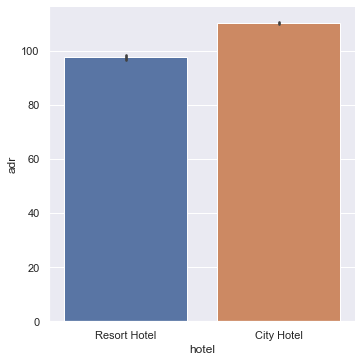

In [42]:
sns.catplot(data = df_hotel_booking, x = 'hotel', y = 'adr', kind= 'bar')

### 6. Showing which customer type canceled their bookings the most

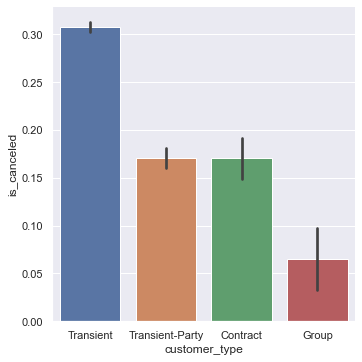

In [43]:
sns.catplot(data = df_hotel_booking, x = 'customer_type', y = 'is_canceled', kind= 'bar')

### 7. What customer type change their booking the most

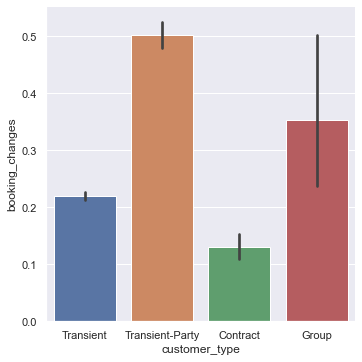

In [44]:
sns.catplot(data = df_hotel_booking, x = 'customer_type', y = 'booking_changes', kind= 'bar')

### 8. which customer type is most likely a repeated guest

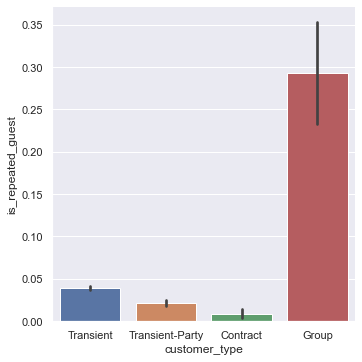

In [45]:
sns.catplot(data = df_hotel_booking, x = 'customer_type', y = 'is_repeated_guest', kind= 'bar')

### 9. which customer type stays in week nights

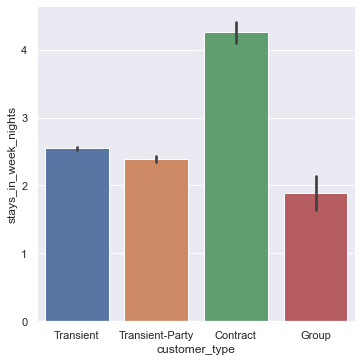

In [46]:
sns.catplot(data = df_hotel_booking, x = 'customer_type', y = 'stays_in_week_nights', kind= 'bar')

### 10. which customer type rquired car parking spaces the most

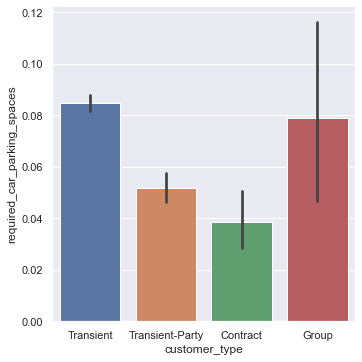

In [47]:
sns.catplot(data = df_hotel_booking, x = 'customer_type', y = 'required_car_parking_spaces', kind= 'bar')

### 11. which customer type has special requests the most

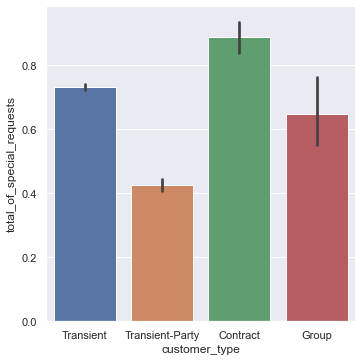

In [48]:
sns.catplot(data = df_hotel_booking, x = 'customer_type', y = 'total_of_special_requests', kind= 'bar')

### 12. What customer type canceled bookings the most given which hotels

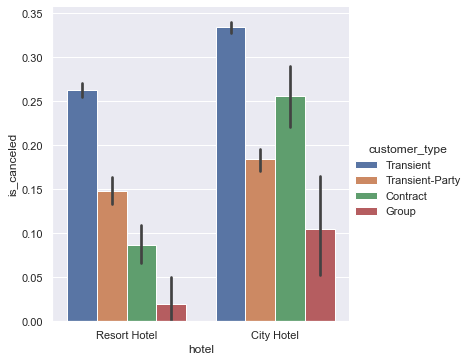

In [49]:
sns.catplot(data = df_hotel_booking, x = 'hotel', y = 'is_canceled', hue = 'customer_type',kind= 'bar')

### 13. Which customer type has the highest adr given with the hotel name

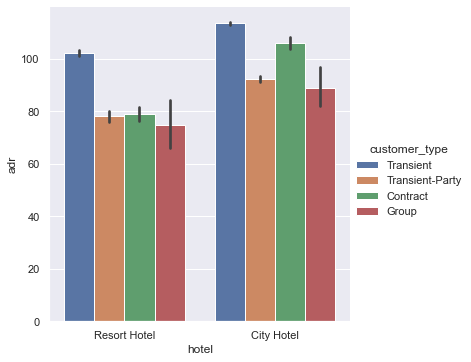

In [50]:
sns.catplot(data = df_hotel_booking, x = 'hotel', y = 'adr',hue = 'customer_type', kind= 'bar')

### 14. which cutomer type has the most booking changes given with the hotel names

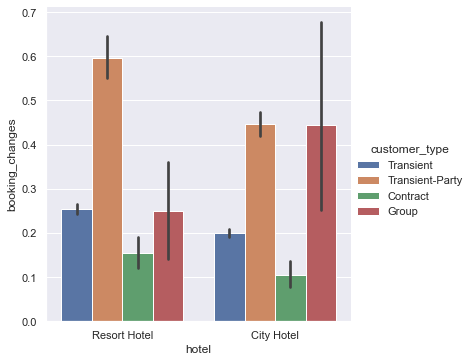

In [51]:
sns.catplot(data = df_hotel_booking, x = 'hotel', y = 'booking_changes',hue = 'customer_type', kind= 'bar')

### 15. which customer type is a repeated guest given the hotel names

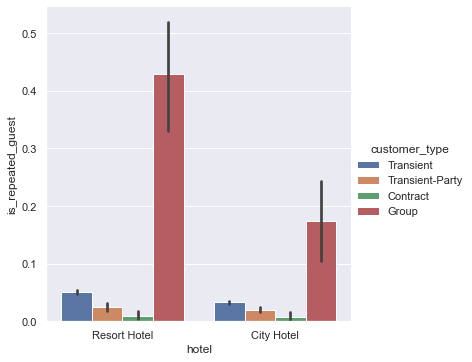

In [52]:
sns.catplot(data = df_hotel_booking, x = 'hotel', y = 'is_repeated_guest',hue = 'customer_type', kind= 'bar')

### 16. which customer type stays in week nights given the hotel names

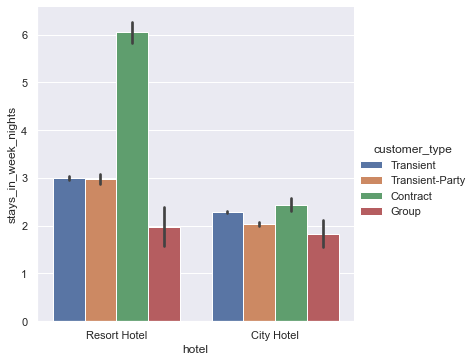

In [53]:
sns.catplot(data = df_hotel_booking, x = 'hotel', y = 'stays_in_week_nights',hue = 'customer_type', kind= 'bar')

### 17. which customer type required car parking spaces given the hotel names

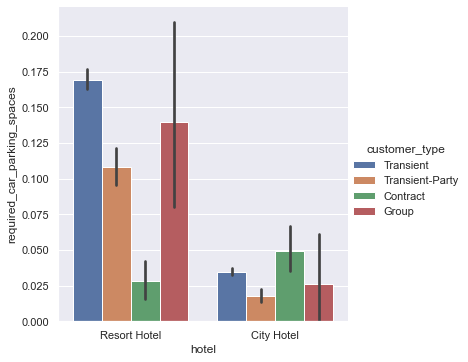

In [54]:
sns.catplot(data = df_hotel_booking, x = 'hotel', y = 'required_car_parking_spaces',hue = 'customer_type', kind= 'bar')

### 18. which customer type has the most special requests given the hotel names

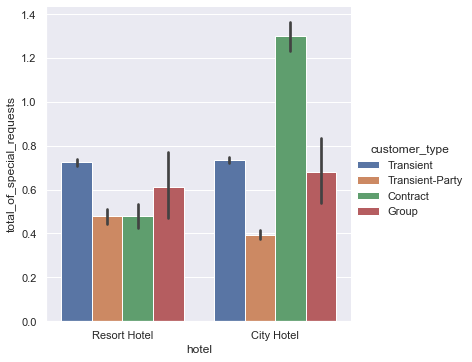

In [55]:
sns.catplot(data = df_hotel_booking, x = 'hotel', y = 'total_of_special_requests',hue = 'customer_type', kind= 'bar')

### 19. Which country canceled their bookings the most

In [56]:
pd.pivot_table(data = df_hotel_booking, values = 'is_canceled', index = ['country','hotel'], aggfunc = 'count' ).sort_values('is_canceled', ascending = False)

is_canceled
country hotel                    
PRT     Resort Hotel         6261
        City Hotel           6114
FRA     City Hotel           3251
GBR     Resort Hotel         2364
        City Hotel           2029
...                           ...
EGY     Resort Hotel            1
NIC     City Hotel              1
DJI     Resort Hotel            1
CRI     Resort Hotel            1
ZWE     Resort Hotel            1

[244 rows x 1 columns]

### 20. which country has the most booking changes

In [57]:
pd.pivot_table(data = df_hotel_booking, values = 'booking_changes', index = ['country','hotel'], aggfunc = 'sum' ).sort_values('booking_changes', ascending = False)

booking_changes
country hotel                        
PRT     Resort Hotel             1713
        City Hotel               1370
GBR     Resort Hotel              783
FRA     City Hotel                665
ESP     Resort Hotel              446
...                               ...
HND     City Hotel                  0
HKG     Resort Hotel                0
GEO     Resort Hotel                0
GAB     City Hotel                  0
ZWE     Resort Hotel                0

[244 rows x 1 columns]

### 21. which country required car parking spaces the most

In [58]:
pd.pivot_table(data = df_hotel_booking, values = 'required_car_parking_spaces', index = ['country','hotel'], aggfunc = 'sum' ).sort_values('required_car_parking_spaces', ascending = False)

,,required_car_parking_spaces
country,hotel,
PRT,Resort Hotel,1031
ESP,Resort Hotel,344
PRT,City Hotel,267
ESP,City Hotel,150
GBR,Resort Hotel,148
...,...,...
IRN,City Hotel,0
IRQ,City Hotel,0
ISL,City Hotel,0


### 22. which country has the most special requests

In [59]:
pd.pivot_table(data = df_hotel_booking, values = 'total_of_special_requests', index = ['country','hotel'], aggfunc = 'sum' ).sort_values('total_of_special_requests', ascending = False)

total_of_special_requests
country hotel                                  
PRT     Resort Hotel                       3870
        City Hotel                         3201
FRA     City Hotel                         2496
GBR     City Hotel                         1611
        Resort Hotel                       1499
...                                         ...
TGO     City Hotel                            0
JAM     Resort Hotel                          0
OMN     City Hotel                            0
JEY     City Hotel                            0
SMR     Resort Hotel                          0

[244 rows x 1 columns]

### 23. Pearson Correlation

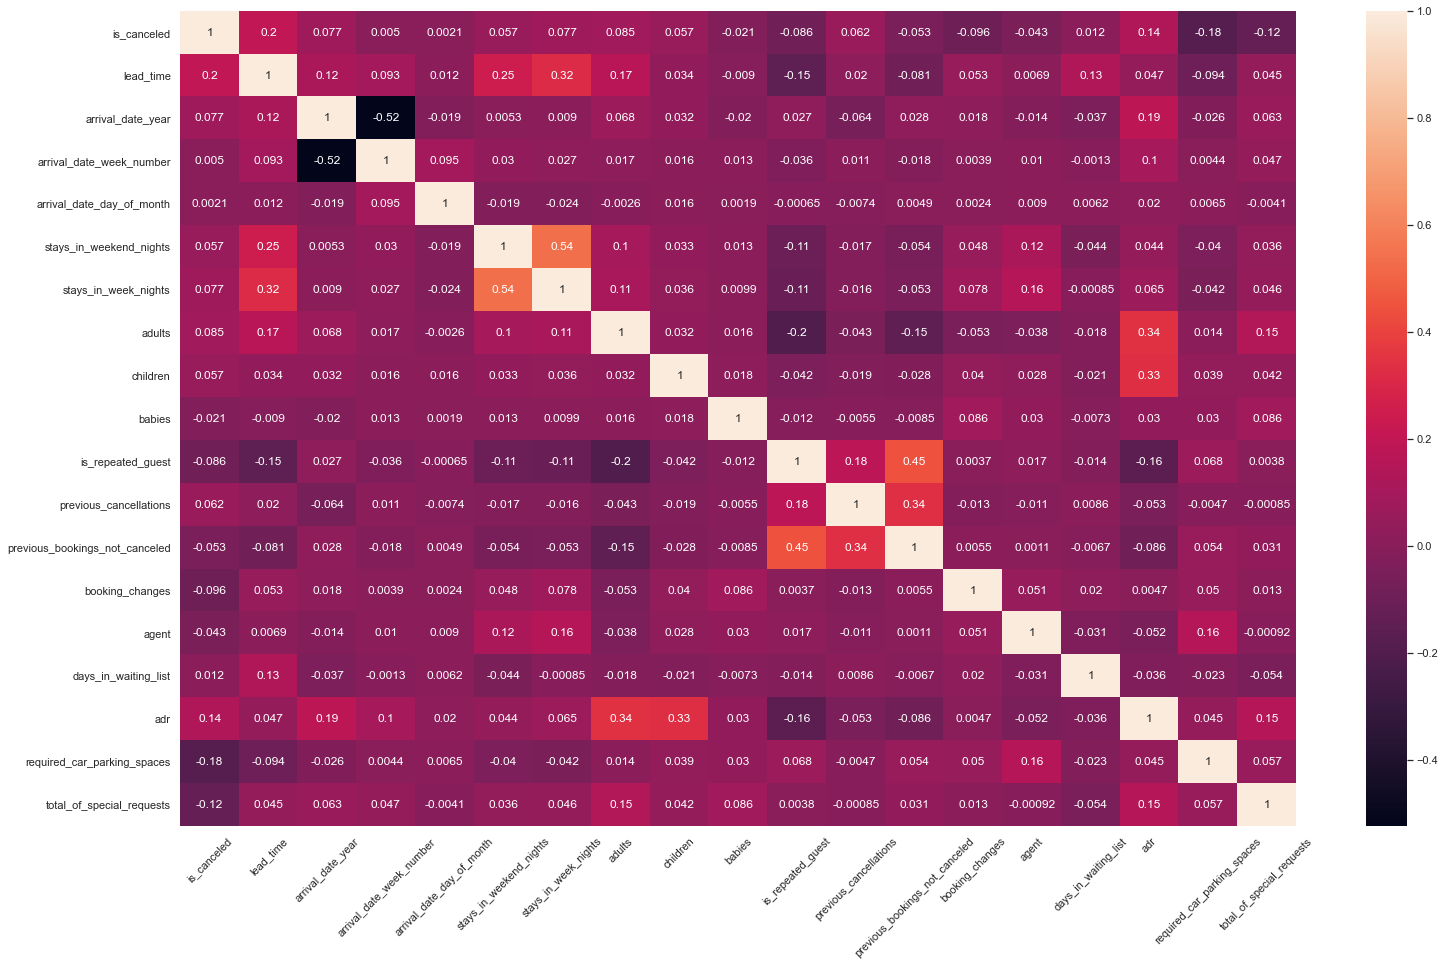

In [60]:
plt.figure(figsize=(25,15))
corr_matrix = df_hotel_booking.corr()
sns.heatmap(data = corr_matrix, annot = True)
plt.xticks(rotation=45)
plt.show()

In [61]:
dfcorr = df_hotel_booking.corr(method='pearson')['is_canceled']
sorted_dfcorr = dfcorr.abs().sort_values(ascending=False)
print(sorted_dfcorr)

is_canceled                       1.000000
lead_time                         0.196397
required_car_parking_spaces       0.181114
adr                               0.136175
total_of_special_requests         0.121449
booking_changes                   0.096165
is_repeated_guest                 0.086393
adults                            0.085119
stays_in_week_nights              0.076772
arrival_date_year                 0.076633
previous_cancellations            0.062032
children                          0.057353
stays_in_weekend_nights           0.056638
previous_bookings_not_canceled    0.053341
agent                             0.042803
babies                            0.020935
days_in_waiting_list              0.012079
arrival_date_week_number          0.004951
arrival_date_day_of_month         0.002107
Name: is_canceled, dtype: float64


# Converting Data

### 1. Data Labeling

In [62]:
df_hotel_booking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38102 entries, 0 to 39257
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           38102 non-null  object 
 1   is_canceled                     38102 non-null  int64  
 2   lead_time                       38102 non-null  int64  
 3   arrival_date_year               38102 non-null  int64  
 4   arrival_date_month              38102 non-null  object 
 5   arrival_date_week_number        38102 non-null  int64  
 6   arrival_date_day_of_month       38102 non-null  int64  
 7   stays_in_weekend_nights         38102 non-null  int64  
 8   stays_in_week_nights            38102 non-null  int64  
 9   adults                          38102 non-null  int64  
 10  children                        38102 non-null  float64
 11  babies                          38102 non-null  int64  
 12  meal                            

In [63]:
df_hotel_booking['hotel']=df_hotel_booking['hotel'].astype('category').cat.codes
df_hotel_booking['customer_type']=df_hotel_booking['customer_type'].astype('category').cat.codes
df_hotel_booking['distribution_channel']=df_hotel_booking['distribution_channel'].astype('category').cat.codes
df_hotel_booking['market_segment']=df_hotel_booking['market_segment'].astype('category').cat.codes
df_hotel_booking['reserved_room_type']=df_hotel_booking['reserved_room_type'].astype('category').cat.codes
df_hotel_booking['arrival_date_month']=df_hotel_booking['arrival_date_month'].astype('category').cat.codes
df_hotel_booking['assigned_room_type']=df_hotel_booking['assigned_room_type'].astype('category').cat.codes
df_hotel_booking['country']=df_hotel_booking['country'].astype('category').cat.codes
df_hotel_booking['reservation_status']=df_hotel_booking['reservation_status'].astype('category').cat.codes
df_hotel_booking['reservation_status_date']=df_hotel_booking['reservation_status_date'].astype('category').cat.codes
df_hotel_booking['meal']=df_hotel_booking['meal'].astype('category').cat.codes
df_hotel_booking['deposit_type']=df_hotel_booking['deposit_type'].astype('category').cat.codes

In [64]:
df_hotel_booking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38102 entries, 0 to 39257
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           38102 non-null  int8   
 1   is_canceled                     38102 non-null  int64  
 2   lead_time                       38102 non-null  int64  
 3   arrival_date_year               38102 non-null  int64  
 4   arrival_date_month              38102 non-null  int8   
 5   arrival_date_week_number        38102 non-null  int64  
 6   arrival_date_day_of_month       38102 non-null  int64  
 7   stays_in_weekend_nights         38102 non-null  int64  
 8   stays_in_week_nights            38102 non-null  int64  
 9   adults                          38102 non-null  int64  
 10  children                        38102 non-null  float64
 11  babies                          38102 non-null  int64  
 12  meal                            

# Machine Learning

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

In [66]:
df_hotel_booking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38102 entries, 0 to 39257
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           38102 non-null  int8   
 1   is_canceled                     38102 non-null  int64  
 2   lead_time                       38102 non-null  int64  
 3   arrival_date_year               38102 non-null  int64  
 4   arrival_date_month              38102 non-null  int8   
 5   arrival_date_week_number        38102 non-null  int64  
 6   arrival_date_day_of_month       38102 non-null  int64  
 7   stays_in_weekend_nights         38102 non-null  int64  
 8   stays_in_week_nights            38102 non-null  int64  
 9   adults                          38102 non-null  int64  
 10  children                        38102 non-null  float64
 11  babies                          38102 non-null  int64  
 12  meal                            

### 1. Creating the Model

In [67]:
df_hotel_booking['is_canceled'].value_counts()

0    27387
1    10715
Name: is_canceled, dtype: int64

In [68]:
adjusted_df_hotel_booking = df_hotel_booking.drop(['reservation_status','reservation_status_date','babies','days_in_waiting_list','meal'], axis = 1)

In [69]:
x = adjusted_df_hotel_booking.drop(['is_canceled'], axis = 1)
y = adjusted_df_hotel_booking['is_canceled']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 42)

In [70]:
#oversample = SMOTE()
#x_train,y_train = oversample.fit_resample(x_train, y_train)

In [71]:
std_scaler = StandardScaler()
std_scaler.fit(x_train)
X_train_std = std_scaler.transform(x_train)
X_test_std = std_scaler.transform(x_test)

mm_scaler = MinMaxScaler()
mm_scaler.fit(x_train)
X_train_mm = mm_scaler.transform(x_train)
X_test_mm = mm_scaler.transform(x_test)

In [72]:
rfc = RandomForestClassifier(n_estimators = 300, random_state=42, verbose=1, n_jobs=-1)
#parameter_rfc = {'n_estimators': [500,600,700]}
#model_rfc = RandomizedSearchCV(estimator = rfc, param_distributions = parameter_rfc, cv=10, verbose=1, random_state = 42, n_jobs = -1)

rfc.fit(x_train, y_train)
#model_rfc_tuned = model_rfc.best_estimator_

y_predict_test = rfc.predict(x_test)
y_predict_train = rfc.predict(x_train)

acc_rfc_test = rfc.score(x_test, y_predict_test)
acc_rfc_train = rfc.score(x_train, y_predict_train)

print(acc_rfc_train,acc_rfc_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   10.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    1.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

1.0 1.0


[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    1.5s finished


### 2. Fiding important Features

In [73]:
importances = rfc.feature_importances_
importances

array([0.00918119, 0.14404725, 0.02833219, 0.03812443, 0.06780283,
       0.07116179, 0.02902078, 0.04651313, 0.01572017, 0.00832689,
       0.10324025, 0.04520149, 0.0099509 , 0.0023137 , 0.02052931,
       0.00472078, 0.01828837, 0.02514275, 0.01903764, 0.02703948,
       0.06080145, 0.02063765, 0.09725211, 0.028368  , 0.05924548])

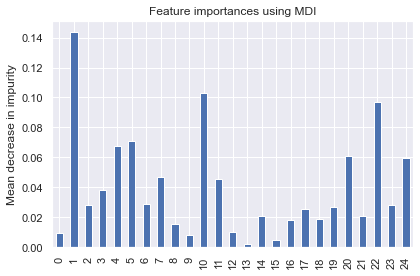

In [74]:
forest_importances = pd.Series(importances)

fig, ax = plt.subplots()
forest_importances.plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [75]:
x.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38102 entries, 0 to 39257
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           38102 non-null  int8   
 1   lead_time                       38102 non-null  int64  
 2   arrival_date_year               38102 non-null  int64  
 3   arrival_date_month              38102 non-null  int8   
 4   arrival_date_week_number        38102 non-null  int64  
 5   arrival_date_day_of_month       38102 non-null  int64  
 6   stays_in_weekend_nights         38102 non-null  int64  
 7   stays_in_week_nights            38102 non-null  int64  
 8   adults                          38102 non-null  int64  
 9   children                        38102 non-null  float64
 10  country                         38102 non-null  int16  
 11  market_segment                  38102 non-null  int8   
 12  distribution_channel            

### 3. Classification Report

In [76]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      5406
           1       0.78      0.64      0.71      2215

    accuracy                           0.84      7621
   macro avg       0.82      0.78      0.80      7621
weighted avg       0.84      0.84      0.84      7621



### 4. Confusion Matrix

In [77]:
print(confusion_matrix(y_test, y_predict_test))

[[5011  395]
 [ 794 1421]]


### 5. Precision Score

In [78]:
print(precision_score(y_test, y_predict_test))

0.7824889867841409
